In [1]:
%matplotlib inline
# load the lib
import os
os.environ['PROJ_LIB'] = '/home/ylk/anaconda3/share/proj'
import pyart
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [35.0, 35.0]
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
N0H = pyart.io.read('/home/ylk/data/test_nexrad/processed/KOUN_SDUS84_N0HVNX_201801011620')
display = pyart.graph.RadarMapDisplay(N0H)
x = N0H.fields['radar_echo_classification']['data']

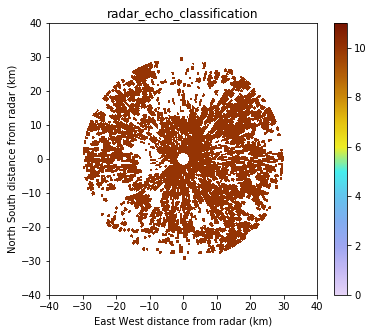

In [5]:
m = np.zeros_like(x)
m[:,120:]=1
y = np.ma.masked_array(x, m)
N0H.fields['radar_echo_classification']['data'] = y

fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot('radar_echo_classification', 0, title='radar_echo_classification',
             colorbar_label='', ax=ax)
display.set_limits(xlim=(-40, 40), ylim=(-40, 40), ax=ax)
plt.show()

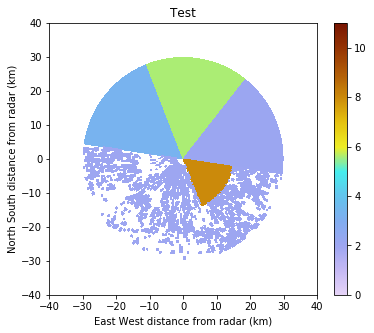

In [8]:
m = np.zeros_like(x)
m[:,120:]=1
y = np.ma.masked_array(x, m)
y[:60,:120] = 3.3
y[60:120,:120] = 5.6
y[120:180,:120] = 2.1
y[180:240,:60] = 8
N0H.fields['radar_echo_classification']['data'] = y

fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot('radar_echo_classification', 0, title='Test',
             colorbar_label='', ax=ax)
display.set_limits(xlim=(-40, 40), ylim=(-40, 40), ax=ax)
plt.show()